# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#import random
from scipy.stats import linregress
from datetime import date


# Import API key
from api_keys import weather_api_key



In [2]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Building the url components that will be statis throughout the search
base_url = "http://api.openweathermap.org/data/2.5/weather?"

params = {
    "units": "imperial",
    "appid": weather_api_key,
}

In [5]:
def convert_temp (temp, scale='C', to='F'):
    '''
    Takes a temperature and converts it to a different scale
    temp must be numeric
    valid values form the starting scale and to scale are 'C': Celsius, 'F': Farenheit, and 'K': Kelvin
    '''
    scales = ['C','F','K']
    #print(scale.upper(),'\n',to,'\n',scales)
    if not ((scale.upper() in scales) and (to.upper() in scales)):
        return ValueError("valid values form the starting scale and to scale are 'C': Celsius, 'F': Farenheit, and 'K': Kelvin")
    
    if scale == 'C' and to == 'F':
        return 32.0 + ((9.0 / 5) * temp)
    
    if scale == 'F' and to == 'C':
        return (-32.0 + temp) * (5.0 / 9)
    
    if scale == 'K' and to == 'C':
        return temp - 273.15
    
    if scale == 'C' and to == 'K':
        return temp + 273.15
    
    if scale == 'K' and to == 'F':
        return 32.0 + ((9.0 / 5) * (temp - 273.15))
    
    if scale == 'F' and to == 'K':
        return ((-32.0 + temp) * (5.0 / 9)) + 273.15
    
    
convert_temp(0)

#Note: this function is not used

32.0

In [9]:
#figuring out which data to extract for each city
params["q"] = np.random.choice(cities)

response = requests.get(base_url, params=params)

'''
{'coord': {'lon': -117.16, 'lat': 32.72},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 16.93,
  'feels_like': 17.09,
  'temp_min': 15,
  'temp_max': 20,
  'pressure': 1013,
  'humidity': 77},
 'visibility': 14484,
 'wind': {'speed': 1.05, 'deg': 257},
 'clouds': {'all': 90},
 'dt': 1594289893,
 'sys': {'type': 1,
  'id': 5771,
  'country': 'US',
  'sunrise': 1594298899,
  'sunset': 1594349950},
 'timezone': -25200,
 'id': 5391811,
 'name': 'San Diego',
 'cod': 200}
'''

'''
City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64
'''

response.json()

{'coord': {'lon': 77.9, 'lat': 26.7},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 91.87,
  'feels_like': 91.27,
  'temp_min': 91.87,
  'temp_max': 91.87,
  'pressure': 998,
  'humidity': 54,
  'sea_level': 998,
  'grnd_level': 979},
 'wind': {'speed': 17.22, 'deg': 259},
 'clouds': {'all': 100},
 'dt': 1594437868,
 'sys': {'country': 'IN', 'sunrise': 1594425752, 'sunset': 1594475093},
 'timezone': 19800,
 'id': 1272805,
 'name': 'Dhaulpur',
 'cod': 200}

In [10]:
data = []
'''
here, I query open weather maps for each city, extracting the following:
name, latitude, longitude, daily high, humidity, cloud coverage %, wind speed
'''
print('Beginning Data Retrieval')     
print('-----------------------------')
j = 1
for i in range(len(cities)):
    params['q'] = cities[i]
    try:
        response = requests.get(base_url, params=params)
        r = response.json()
        city = r['name']
        lat = r['coord']['lat']
        lng = r['coord']['lon']
        max_temp = r['main']['temp_max']
        humid = r['main']['humidity']
        cloud = r['clouds']['all']
        wind = r['wind']['speed']
        country = r['sys']['country']
        today = date.today()

        r_data = [city,lat,lng,max_temp,humid,cloud,wind,country,today]
        
        data.append(r_data)
        print(f'Processing Record {i%50+1} of Set {j} | {cities[i]}')
        
    except (KeyError, IndexError):
        print('City not found. Skipping...')
        
    if (i + 1) % 50 == 0:
        j += 1
        time.sleep(10)
        

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | biak
Processing Record 3 of Set 1 | conceicao do araguaia
Processing Record 4 of Set 1 | lavrentiya
Processing Record 5 of Set 1 | buritis
Processing Record 6 of Set 1 | collie
Processing Record 7 of Set 1 | kiunga
Processing Record 8 of Set 1 | bozhou
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | narsaq
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | emerald
Processing Record 13 of Set 1 | kathu
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | livani
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | north bend
Processing Record 18 of Set 1 | anadyr
City not found. Skipping...
Processing Record 20 of Set 1 | san andres
Processing Record 21 of Set 1 | havelock
Processing Record 22 of Set 1 | nanortalik
Processing Record 23 of Set 1 | ushuaia
Processing Rec

Processing Record 6 of Set 5 | zemio
Processing Record 7 of Set 5 | port hardy
Processing Record 8 of Set 5 | turinskaya sloboda
Processing Record 9 of Set 5 | rawson
Processing Record 10 of Set 5 | dire dawa
Processing Record 11 of Set 5 | avarua
Processing Record 12 of Set 5 | westport
Processing Record 13 of Set 5 | geraldton
City not found. Skipping...
Processing Record 15 of Set 5 | rundu
Processing Record 16 of Set 5 | marquard
Processing Record 17 of Set 5 | kaitangata
Processing Record 18 of Set 5 | ryotsu
Processing Record 19 of Set 5 | ribeira grande
Processing Record 20 of Set 5 | zaysan
Processing Record 21 of Set 5 | solikamsk
Processing Record 22 of Set 5 | nador
Processing Record 23 of Set 5 | tautira
City not found. Skipping...
Processing Record 25 of Set 5 | lodja
Processing Record 26 of Set 5 | nichinan
Processing Record 27 of Set 5 | bereda
Processing Record 28 of Set 5 | kachug
Processing Record 29 of Set 5 | kabardinka
Processing Record 30 of Set 5 | sinjai
Process

Processing Record 11 of Set 9 | hokitika
Processing Record 12 of Set 9 | sonkovo
Processing Record 13 of Set 9 | padang
Processing Record 14 of Set 9 | san martin
Processing Record 15 of Set 9 | ketchikan
City not found. Skipping...
Processing Record 17 of Set 9 | hami
Processing Record 18 of Set 9 | luanda
Processing Record 19 of Set 9 | sawakin
Processing Record 20 of Set 9 | warrington
Processing Record 21 of Set 9 | kursk
City not found. Skipping...
Processing Record 23 of Set 9 | marsh harbour
Processing Record 24 of Set 9 | sobolevo
Processing Record 25 of Set 9 | richards bay
Processing Record 26 of Set 9 | beira
Processing Record 27 of Set 9 | gazojak
Processing Record 28 of Set 9 | udachnyy
City not found. Skipping...
Processing Record 30 of Set 9 | zhob
City not found. Skipping...
Processing Record 32 of Set 9 | mao
Processing Record 33 of Set 9 | mossoro
Processing Record 34 of Set 9 | sao filipe
Processing Record 35 of Set 9 | bilibino
Processing Record 36 of Set 9 | quatre

In [11]:
data[0:5]

[['Butaritari',
  3.07,
  172.79,
  82.92,
  77,
  99,
  12.01,
  'KI',
  datetime.date(2020, 7, 10)],
 ['Biak',
  -0.91,
  122.88,
  80.58,
  80,
  99,
  7.36,
  'ID',
  datetime.date(2020, 7, 10)],
 ['Conceição do Araguaia',
  -8.26,
  -49.26,
  75.72,
  61,
  19,
  1.14,
  'BR',
  datetime.date(2020, 7, 10)],
 ['Lavrentiya',
  65.58,
  -171,
  53.82,
  60,
  5,
  4.21,
  'RU',
  datetime.date(2020, 7, 10)],
 ['Buritis',
  -15.62,
  -46.42,
  68.68,
  52,
  30,
  3.18,
  'BR',
  datetime.date(2020, 7, 10)]]

In [12]:
for i in range(len(data)):
    data[i][8] = data[i][8].isoformat()

In [13]:
'''
City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64
'''
weather_df = pd.DataFrame(data, columns=['City Name', 'Latitude', 'Longitude', 'Daily High', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])

In [14]:
weather_df.head()

,City Name,Latitude,Longitude,Daily High,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.07,172.79,82.92,77,99,12.01,KI,2020-07-10
1,Biak,-0.91,122.88,80.58,80,99,7.36,ID,2020-07-10
2,Conceição do Araguaia,-8.26,-49.26,75.72,61,19,1.14,BR,2020-07-10
3,Lavrentiya,65.58,-171.00,53.82,60,5,4.21,RU,2020-07-10
4,Buritis,-15.62,-46.42,68.68,52,30,3.18,BR,2020-07-10


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
weather_df.to_csv(output_data_file, index=False)

In [ ]:
# weather_df = pd.read_csv(output_data_file)
# weather_df.head()

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
#  Get the indices of cities that have humidity over 100%.
sweaty_df = weather_df.loc[weather_df['Humidity'] > 100]
sweaty_df.index

Int64Index([], dtype='int64')

In [20]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(sweaty_df.index)
clean_city_data.head()

,City Name,Latitude,Longitude,Daily High,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.07,172.79,82.92,77,99,12.01,KI,2020-07-10
1,Biak,-0.91,122.88,80.58,80,99,7.36,ID,2020-07-10
2,Conceição do Araguaia,-8.26,-49.26,75.72,61,19,1.14,BR,2020-07-10
3,Lavrentiya,65.58,-171.00,53.82,60,5,4.21,RU,2020-07-10
4,Buritis,-15.62,-46.42,68.68,52,30,3.18,BR,2020-07-10


In [21]:
# Extract relevant fields from the data frame
##Which fields?

# Export the City_Data into a csv
## a second csv?
output_data_file = 'output_data/clean_cities.csv'
clean_city_data.to_csv(output_data_file, index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [26]:
clean_city_data.head()

,City Name,Latitude,Longitude,Daily High,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.07,172.79,82.92,77,99,12.01,KI,2020-07-10
1,Biak,-0.91,122.88,80.58,80,99,7.36,ID,2020-07-10
2,Conceição do Araguaia,-8.26,-49.26,75.72,61,19,1.14,BR,2020-07-10
3,Lavrentiya,65.58,-171.00,53.82,60,5,4.21,RU,2020-07-10
4,Buritis,-15.62,-46.42,68.68,52,30,3.18,BR,2020-07-10


## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Daily Temperature (F)')

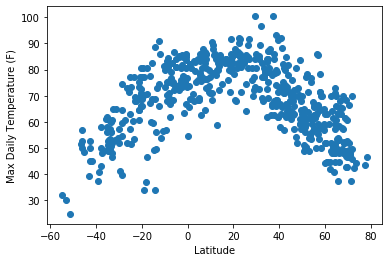

In [41]:
#linRegPlot(clean_city_data,clean_city_data,'','')
plt.scatter(clean_city_data['Latitude'], clean_city_data['Daily High'])
plt.xlabel('Latitude')
plt.ylabel('Max Daily Temperature (F)')

* As we can see, the temperatures of the earth are highest around the equator and lowest near the poles. There appears to be a relationship, but it's not linear

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

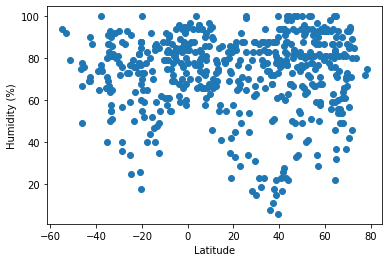

In [42]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

* The humidity appears to be the Lowest near the equator and the poles, but there is no clear linear relationship between latitude and humidity

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

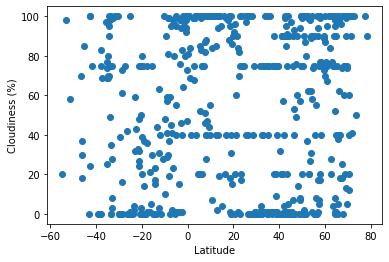

In [43]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

* There appears to be no linear correlation between latitude and cloudiness, however the data appears to be 'snapped' to 10% increments because it is based on human judgement

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

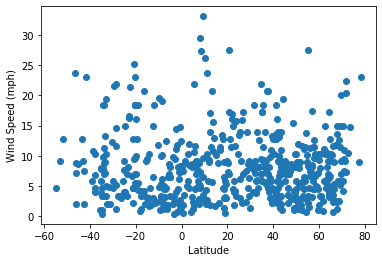

In [44]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

* There appears to be no clear linear correlation between latitude and windspeed, but the highest wind speeds are near the equator

## Linear Regression

In [77]:
# OPTIONAL: Create a function to create Linear Regression plots
def linRegPlot(x_values, y_values, x_label = "", y_label = ""):
    '''
    Takes the x values and y values for a scatter plot,
    runs a linear regression comparing the two values,
    and then displays a scatter plot with the regression line
    '''
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,'r')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    print('The r-squared-value of the relationship is', round(rvalue**2,4))

In [46]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = clean_city_data.loc[clean_city_data['Latitude'] >= 0]
southern_df = clean_city_data.loc[clean_city_data['Latitude'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

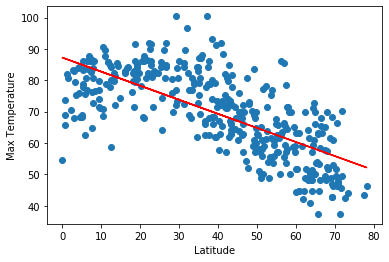

The r-value of the relationship is -0.7033


In [51]:
linRegPlot(northern_df['Latitude'], northern_df['Daily High'],'Latitude','Max Temperature')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

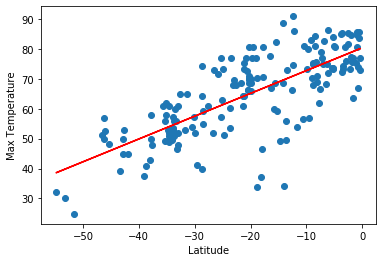

The r-value of the relationship is 0.7459


In [52]:
linRegPlot(southern_df['Latitude'], southern_df['Daily High'],'Latitude','Max Temperature')

* There is a strong linear correlation between the latitude and the daily high on each side of the equator
* It is strongly negative in the northern hemisphere, and strongly positive in the southern hemisphere.
* This matches our earlier observation that temperature goes down as we go away from the equator

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

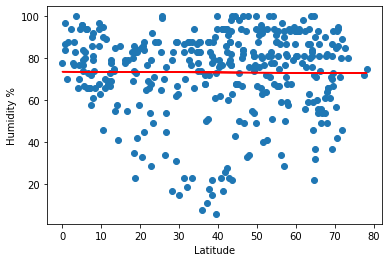

The r-value of the relationship is -0.0092


In [53]:
linRegPlot(northern_df['Latitude'], northern_df['Humidity'],'Latitude','Humidity %')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

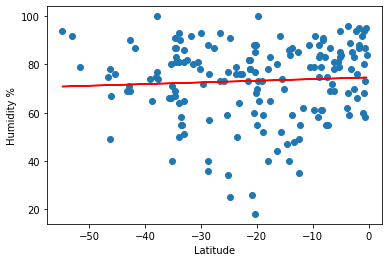

The r-value of the relationship is 0.0581


In [54]:
linRegPlot(southern_df['Latitude'], southern_df['Humidity'],'Latitude','Humidity %')

* The correlation betweeen latitude and humidity is extremely weak
* It would be helpful to analyze the data to see if the lack of low humidity at the poles and equator is significant

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

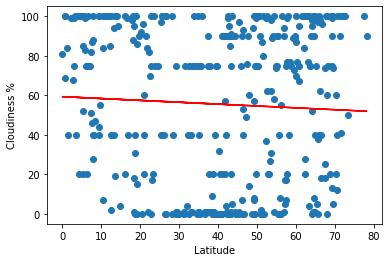

The r-value of the relationship is -0.0496


In [55]:
linRegPlot(northern_df['Latitude'], northern_df['Cloudiness'],'Latitude','Cloudiness %')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

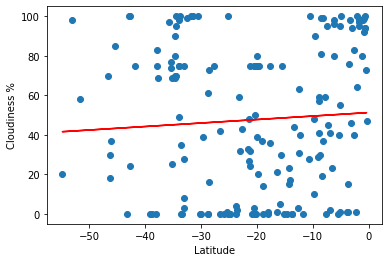

The r-value of the relationship is 0.065


In [56]:
linRegPlot(southern_df['Latitude'], southern_df['Cloudiness'],'Latitude','Cloudiness %')

* There regression shows that there is no relationship between latitude and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

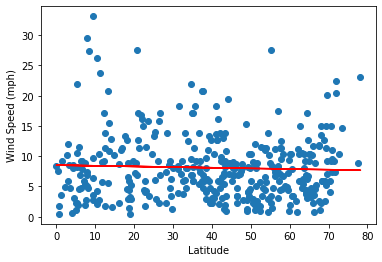

The r-value of the relationship is -0.0413


In [57]:
linRegPlot(northern_df['Latitude'], northern_df['Wind Speed'],'Latitude','Wind Speed (mph)')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

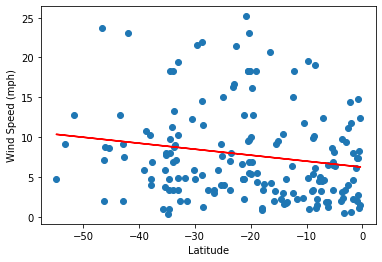

The r-squared-value of the relationship is 0.0305


In [78]:
linRegPlot(southern_df['Latitude'], southern_df['Wind Speed'],'Latitude','Wind Speed (mph)')

* There regression shows that there is no relationship between latitude and wind speed.